# L.2 Visualization in Python 🐍

## 2.1 Matplotlib
[Matplotlib](https://matplotlib.org/) is widely used library to create plots and figures in python. We will use the library to create all kind of plots.

![](https://matplotlib.org/_static/logo2_compressed.svg)

We recommend this [Tutorial](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)

In [1]:
# Include numpy and link instance to variable np
import numpy as np

# Include library and link instance to plt
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn-deep')
# Display which styles are available out of the box
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 2.1.1 Data set and preparation

In [2]:
# Create artificial data set
x = np.arange(0.0, 5.0, 0.01)  # (start, end, increment)
y = 1 + np.sin(2 * np.pi * x)  # f(x) = 1 + sin(2x) = y

# import iris data set
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
x_iris = iris.data[:, :2]  # get only the first two features. Remeber: :2 --> [0;2[
y_iris = iris.target

### 2.1.2 2D line plot

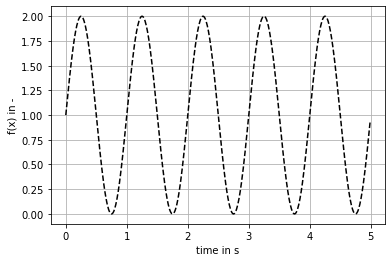

In [3]:
fig, ax = plt.subplots()  # figure holds global parameters; ax hold axis specific parameter such as labels, values, ... 
ax.plot(x, y, color='k', linestyle='dashed', label='f(x) = 1 + sin(2x)')  # line plot with specific parameters

ax.set_xlabel('time in s')  # set x label manually
ax.set_ylabel('f(x) in -')  # set y label manually
# ax.set(xlabel='time in s', ylabel='f(x) in -')  # set both labels in one call

ax.grid()  # display grid
plt.show()  # display image

In [4]:
# We can activate an interactive tool (% - called magic in jupyter) to make a plot more pleasant
%matplotlib notebook

<IPython.core.display.Javascript object>


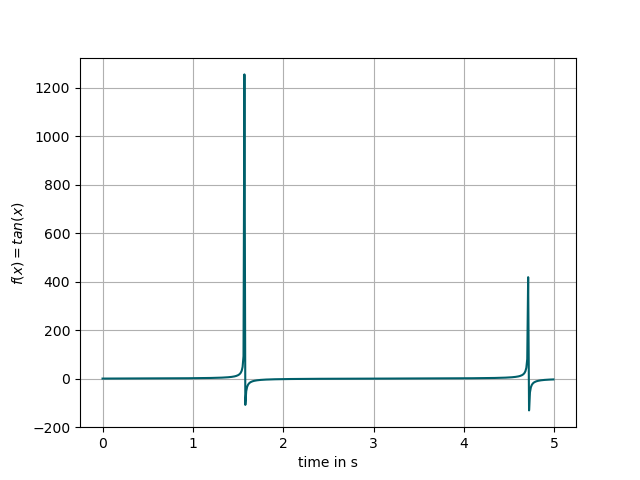

In [5]:
# Display magic
fig, ax = plt.subplots()  # figure holds global parameters; ax hold axis specific parameter such as labels, values, ... 
ax.plot(x, np.tan(x), color='#005f6a', label='f(x) = tan(x)')

ax.set(xlabel='time in s', ylabel=r'$f(x) = tan(x)$ ')  # LaTeX is possible

ax.grid()  # display grid
plt.show()  # display image

### 2.1.3 2D scatter plot

<IPython.core.display.Javascript object>


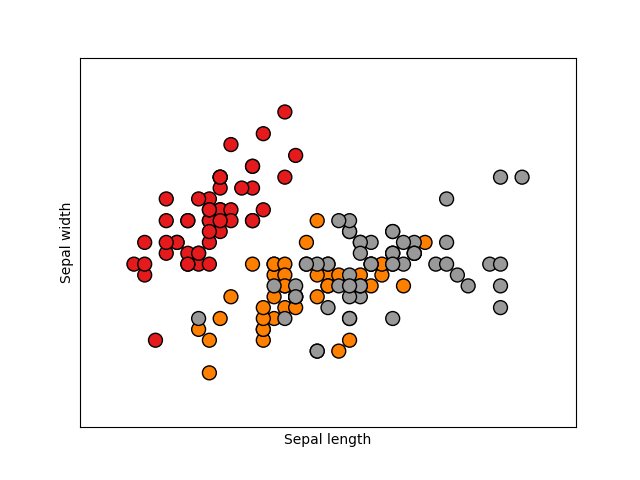

In [14]:
x_min, x_max = x_iris[:, 0].min() - .5, x_iris[:, 0].max() + .5
y_min, y_max = x_iris[:, 1].min() - .5, x_iris[:, 1].max() + .5

fig, ax = plt.subplots()

# Plot the data set
ax.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=plt.cm.Set1, edgecolor='k', s=100)

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.xticks(());
plt.yticks(());

### 2.2.4 3D scatter plot

<IPython.core.display.Javascript object>


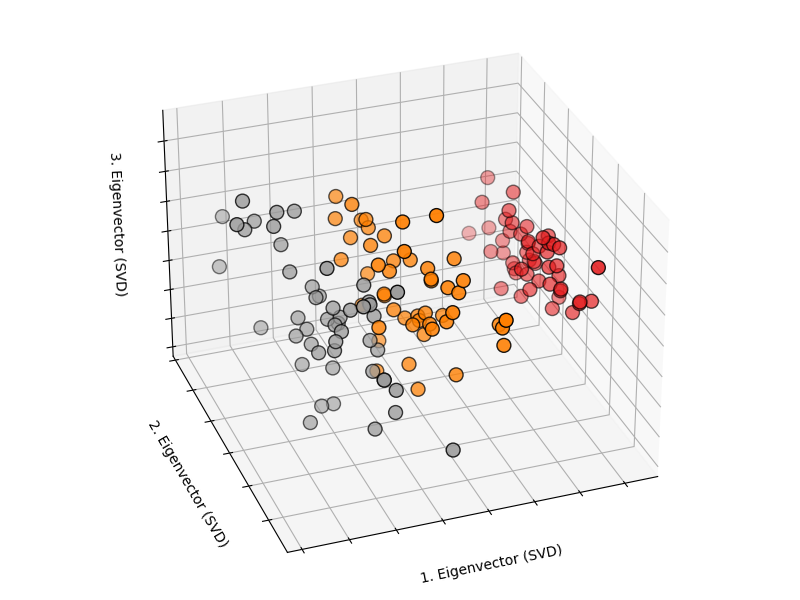

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # Need further modules for 3D.

fig = plt.figure(1, figsize=(8, 6))  # We define the image size in inches
ax = Axes3D(fig, elev=-150, azim=110)  # Define the 3D axis with alignments

X_reduced = PCA(n_components=3).fit_transform(iris.data)  # Linear dimensionality reduction using Singular Value Decomposition

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_iris, cmap=plt.cm.Set1, edgecolor='k', s=100)

ax.set_xlabel("1. Eigenvector (SVD)")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2. Eigenvector (SVD)")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3. Eigenvector (SVD)")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 2.2.5 2D image

<IPython.core.display.Javascript object>


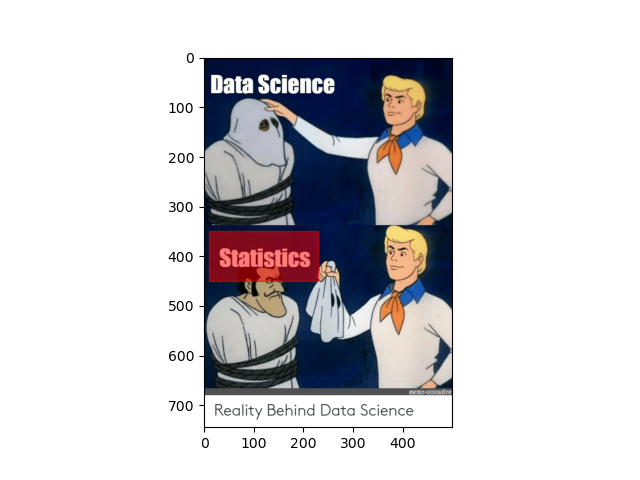

In [10]:
fig, ax = plt.subplots() 
a = plt.imread("https://pics.me.me/reality-behind-data-science-70933954.png")
ax.imshow(a);

In [11]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
ax.add_patch(patches.Rectangle((10, 350), 220, 100, fill=True, color='red', alpha=0.5))

### 2.2.6 2D hist plot

<IPython.core.display.Javascript object>


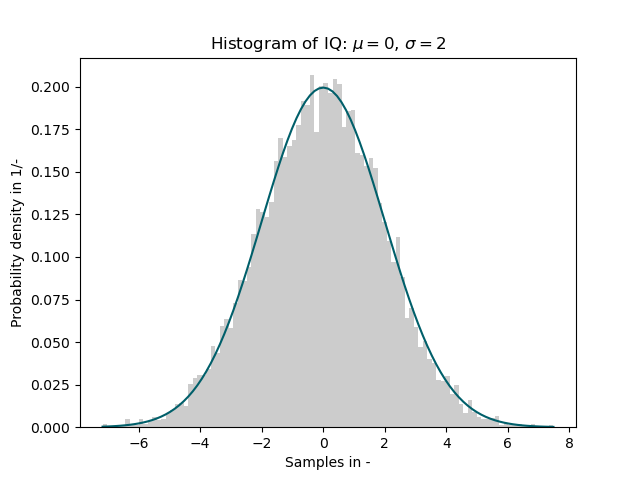

In [12]:
fig, ax = plt.subplots()

#np.random.seed(123456789)
mu = 0  # Mean of distribution
sigma = 2  # Standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 100  # Number of bins

# The histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, color='k', alpha=0.2)

# add a gaussian line
y_gaussian = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y_gaussian, color='#005f6a')
ax.set_xlabel('Samples in -')
ax.set_ylabel('Probability density in 1/-')

ax.set_title(r'Histogram of IQ: $\mu=' + str(mu) + '$, $\sigma=' + str(sigma) + '$')

plt.show()